In [67]:
# Importamos las librerias necesarias para operaciones, archivo, visualización de graficos y para correr los modelos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [70]:
# Cargamos los datos y los visualizamos
df = pd.read_excel('FuelConsumptionCo2.xlsx')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [72]:
# Pedimos una derscripción para explorar nuestra base de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [73]:
# Eliminamos columnas categóricas, para quedarnos solo con las númericas
df_numeric = df.select_dtypes(include=[np.number])

<Axes: >

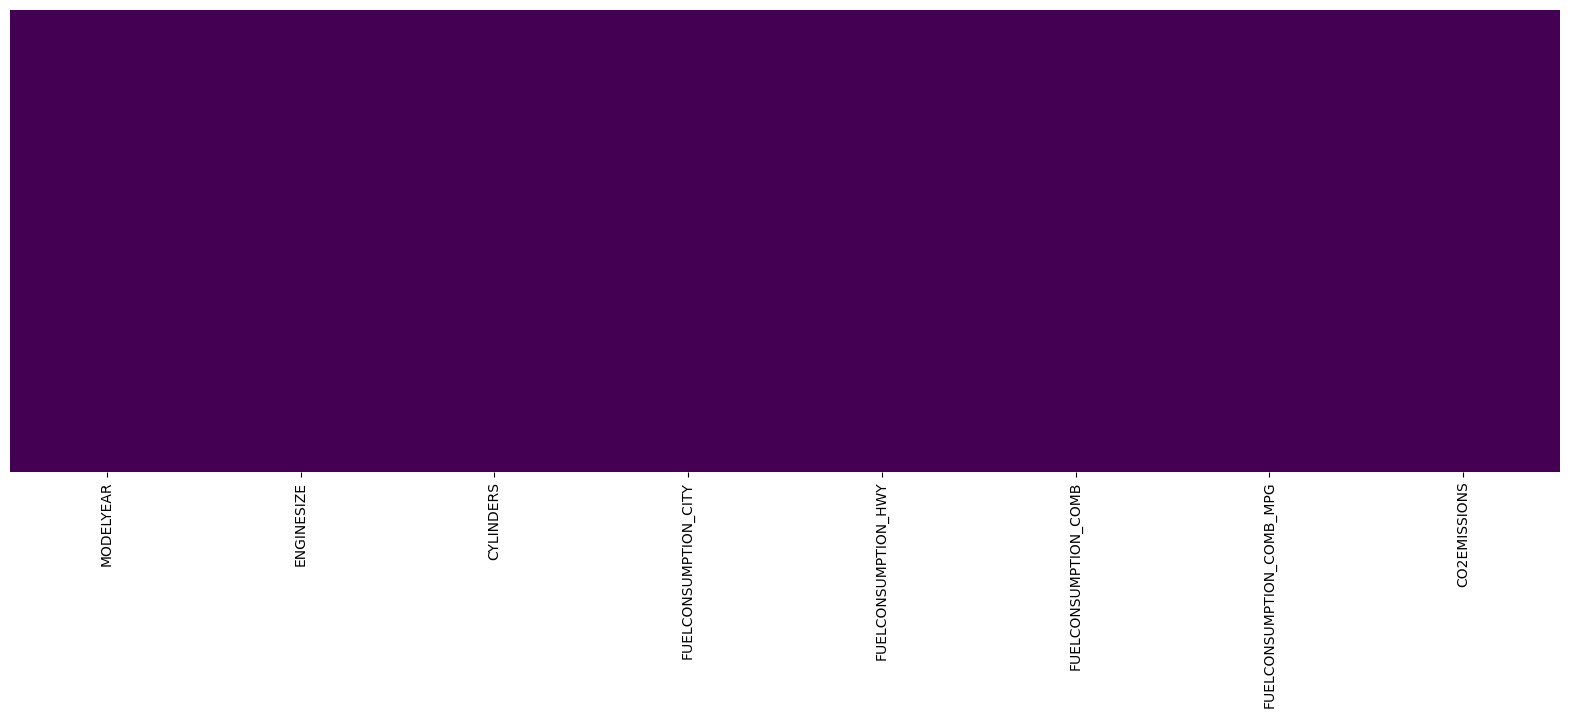

In [75]:
# Revisamos visualmente que no tengamos valores nulos
plt.figure(figsize=(20,6)) # Definimos el tamaño de la figura
sns.heatmap(df_numeric.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [76]:
# Como observamos esta lompia, pero aún así hacemos otra verificación de valores nulos con código
print(df_numeric.isnull().sum())

MODELYEAR                   0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [77]:
# corroboramos el tamaño de nuestra base de Datos
df_numeric.shape 

(945, 8)

In [87]:
# Hacemos la definición de nuestras variables
X = df_numeric.drop('CO2EMISSIONS', axis=1)
y = df_numeric['CO2EMISSIONS']

In [88]:
# Pedimos que nos muestre
X

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2022,2.4,4,9.9,7.0,8.6,33
1,2022,3.5,6,12.6,9.4,11.2,25
2,2022,2.0,4,11.0,8.6,9.9,29
3,2022,2.0,4,11.3,9.1,10.3,27
4,2022,2.0,4,11.2,8.0,9.8,29
...,...,...,...,...,...,...,...
940,2022,2.0,4,10.7,7.7,9.4,30
941,2022,2.0,4,10.5,8.1,9.4,30
942,2022,2.0,4,11.0,8.7,9.9,29
943,2022,2.0,4,11.5,8.4,10.1,28


In [89]:
# Ahora pedimos que nos muestre Y
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

In [91]:
# Ahora usamos Machine Learning para hacer la división en grupos de entrenamiento (training) y de prueba (testing) Como esta ya cargada la libreria nos vamos directo a la instrucción
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Tomo arbitrariamente 42, por tradición, aunque aclaro que cualquier numero podria funcionar, siempre que este sea un valor entero

In [93]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Hacemos la regresión Lineal Múltiple
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
# Impresión de coeficientes de regresión lineal multiple
print("Intercepto: ", model_lr.intercept_)
print("Coeficientes: ", model_lr.coef_)

Intercepto:  260.21560846560845
Coeficientes:  [ 0.          0.31713431  7.95632003  4.18964803  7.95861208 36.27085945
 -9.76792333]


In [97]:
# Ahora hacemos e imprimimos la predicción
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([242.92694037, 306.42675941, 311.13347263, 251.42850259,
       270.31911475, 213.54102758, 264.99969682, 179.21743937,
       254.99756731, 286.04122934, 102.23687277, 266.83764481,
       242.13087491, 202.99683069, 264.32026568, 211.90922941,
       279.68243239, 207.3161498 , 191.33187219, 295.22225251,
       325.45516421, 186.59161482, 378.00138706, 329.56873035,
       264.99969682, 219.91253015, 348.03143577, 356.50453138,
       167.74940168, 322.99267126, 305.50331546, 239.30092247,
       287.54882086, 242.03165063, 216.9085228 , 196.07102364,
       178.50279614, 358.81368386, 355.67372013, 235.77207796,
       233.27956473, 293.17413604, 328.18540885, 169.21374635,
       264.87650402, 211.44807095, 238.46258592, 326.49912357,
       353.79259086, 283.26420272, 159.54956937, 237.29194622,
       289.49787301, 277.71111818, 434.00229489, 223.29269898,
       180.68686158, 293.68882418, 166.93602156, 309.80222381,
       468.36155298, 287.89856882, 223.48663278, 123.77

In [100]:
# Calculamos e imprimimos los indicadores de bondad de ajuste
# como previamente ya se bajaron las librerias, ahora solo aplicamos los indicadores, Agrego lr para indicar que corresponden a la regresion lineal
print("Regresión Lineal Múltiple:")
print ("Valor de R cuadrada: ", r2_score(y_test, y_pred_lr))
print("Error absoluto medio: ", mean_absolute_error(y_test, y_pred_lr))
print("Error cuadratico medio: ", mean_squared_error(y_test, y_pred_lr))
print("Raíz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Regresión Lineal Múltiple:
Valor de R cuadrada:  0.9004924315633441
Error absoluto medio:  7.339144920646457
Error cuadratico medio:  368.8672604772697
Raíz del error cuadratico medio:  19.20591732975204


In [132]:
# Pronóstico con la Regresión líneal
pred_lr = model_lr.predict(X_test_scaled[0].reshape(1, -1))
print("Resumen del prónostico de la regresión líneal:")
print(f"Pronóstico Regresión Líneal: {pred_lr[0]}")
print(f"Valor real: {y_test.iloc[0]}")

Resumen del prónostico de la regresión líneal:
Pronóstico Regresión Líneal: 242.92694037393744
Valor real: 247


In [133]:
# Regresión Ridge
ridge = Ridge()
parameters = {'alpha': np.logspace(-4, 4, 20)}  # Generaremos 20 valores de alpha distribuidos logarítmicamente entre 10 a la menos 4 y 10 a la 4ta 
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5) # Damos la instrucción para realizar una búsqueda  para encontrar la mejor combinación con una validación cruzada de 5 pliegues
ridge_regressor.fit(X_train_scaled, y_train) # Hacemos entrenamiento
y_pred_ridge = ridge_regressor.predict(X_test_scaled) # hacemos la predicción

In [134]:
# Calculamos e imprimimos los indicadores de bondad de ajuste
print("Regresión Ridge:")
print ("Valor de R cuadrada: ", r2_score(y_test, y_pred_ridge))
print("Error absoluto medio: ", mean_absolute_error(y_test, y_pred_ridge))
print("Error cuadratico medio: ", mean_squared_error(y_test, y_pred_ridge))
print("Raíz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Regresión Ridge:
Valor de R cuadrada:  0.9025991357657954
Error absoluto medio:  7.457991075299378
Error cuadratico medio:  361.0578624585766
Raíz del error cuadratico medio:  19.001522635267328


In [135]:
# Pronóstico Ridge
print("Resumen Ridge:")
pred_ridge = ridge_regressor.predict(X_test_scaled[0].reshape(1, -1))
print(f"Pronóstico Ridge: {pred_ridge[0]}") 
print(f"Valor real: {y_test.iloc[0]}")

Resumen Ridge:
Pronóstico Ridge: 243.21348417292504
Valor real: 247


In [136]:
# Regresión Lasso
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5) # Aplicamos la regresión Lasso
lasso_regressor.fit(X_train_scaled, y_train) #para el entrenamiento escalado
y_pred_lasso = lasso_regressor.predict(X_test_scaled) # Para la predicción

In [137]:
# Calculamos e imprimimos los indicadores de bondad de ajuste
print("Regresión Lasso:")
print ("Valor de R cuadrada: ", r2_score(y_test, y_pred_lasso))
print("Error absoluto medio: ", mean_absolute_error(y_test, y_pred_lasso))
print("Error cuadratico medio: ", mean_squared_error(y_test, y_pred_lasso))
print("Raíz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Regresión Lasso:
Valor de R cuadrada:  0.9003487930086278
Error absoluto medio:  7.35414085943996
Error cuadratico medio:  369.3997180682803
Raíz del error cuadratico medio:  19.219774141968482


In [138]:
# Pronóstico Lasso
print("Resumen del prónostico Lasso:")
pred_lasso = lasso_regressor.predict(X_test_scaled[0].reshape(1, -1))
print(f"Pronóstico Lasso: {pred_lasso[0]}")
print(f"Valor real: {y_test.iloc[0]}")

Resumen del prónostico Lasso:
Pronóstico Lasso: 243.5999472397011
Valor real: 247


In [143]:
# Comparación de modelos
print("\nComparación de los indicadores de bondad de ajuste de los modelos:")
print (f"Valor de R cuadrada - Lineal: {r2_score(y_test, y_pred_lr)}, Ridge: {r2_score(y_test, y_pred_ridge)}, Lasso: {r2_score(y_test, y_pred_lasso)}")
print(f"Error absoluto medio - Lineal: {mean_absolute_error(y_test, y_pred_lr)}, Ridge: {mean_absolute_error(y_test, y_pred_ridge)}, Lasso: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Error cuadratico medio - Lineal: {mean_squared_error(y_test, y_pred_ridge)}, Ridge: {mean_squared_error(y_test, y_pred_ridge)}, Lasso: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Raíz del error cuadratico medio - Lineal: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}, Ridge: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}, Lasso: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")


Comparación de los indicadores de bondad de ajuste de los modelos:
Valor de R cuadrada - Lineal: 0.9004924315633441, Ridge: 0.9025991357657954, Lasso: 0.9003487930086278
Error absoluto medio - Lineal: 7.339144920646457, Ridge: 7.457991075299378, Lasso: 7.35414085943996
Error cuadratico medio - Lineal: 361.0578624585766, Ridge: 361.0578624585766, Lasso: 369.3997180682803
Raíz del error cuadratico medio - Lineal: 19.20591732975204, Ridge: 19.001522635267328, Lasso: 19.219774141968482


## Si analizamos por separado los indicadores de bondad encontramos que:
- La regresión Ridge tiene el R cuadrado más alto, lo que sugiere que explica una mayor proporción de la variabilidad en los datos
- La regresión Lineal tiene el MAE más bajo, lo que indica que sus predicciones son, en promedio, las más cercanas a los valores reales
- La regresión Lineal y Ridge tienen el Error Cuadrático Medio más bajo, lo que nos indica un mejor ajuste
- La regresión de Ridge tiene la Raíz del Error Cuadrático Medio más bajo, esto nos proporciona una medida del error en las mismas unidades que la variable dependiente.

In [147]:
# Comparación de pronosticos
print("\nComparación de Pronosticos de los modelos:")
print(f"Valor real: {y_test.iloc[0]}")
print(f"Pronóstico - Lineal: {pred_lr[0]}, Ridge: {pred_ridge}, Lasso: {pred_lasso}")


Comparación de Pronosticos de los modelos:
Valor real: 247
Pronóstico - Lineal: 242.92694037393744, Ridge: [243.21348417], Lasso: [243.59994724]


## Comparación en los pronosticos:
Como se puede observar los pronosticos son muy similares, la variación es muy poca, pero por pronostico la regresiópn Lasso es el que más se acerca

## Conclusión
La elección final podría depender de la importancia relativa de las diferentes métricas y de las necesidades específicas del problema. 
#### 
Si la interpretabilidad del modelo es crucial, la regresión lineal simple podría ser preferible, basandonos en los indicadores de Bondad 
#### 
Si se busca la mayor precisión posible, entonces Ridge podría ser la mejor opción, basandonos en los indicadores de bondad, aún cuando Lasso nos ofrezca mayor acertividad en pronóstico, siempre es importante guiarnos más por los indicadores de bondadque por el resultado final en un pronóstico